<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [7]:
import itertools
import wget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [8]:
wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')

'loan_train.csv'

### Load Data From CSV File


In [119]:
df = pd.read_csv('loan_train.csv')
df= df.sample(frac=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
47,56,56,PAIDOFF,1000,30,9/11/2016,10/10/2016,27,High School or Below,male
105,126,126,PAIDOFF,1000,15,9/11/2016,9/25/2016,28,High School or Below,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
114,135,135,PAIDOFF,1000,30,9/11/2016,10/10/2016,30,High School or Below,male
41,49,49,PAIDOFF,800,15,9/11/2016,9/25/2016,50,High School or Below,male


In [120]:
df.shape

(346, 10)

### Convert to date time object


In [121]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
47,56,56,PAIDOFF,1000,30,2016-09-11,2016-10-10,27,High School or Below,male
105,126,126,PAIDOFF,1000,15,2016-09-11,2016-09-25,28,High School or Below,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
114,135,135,PAIDOFF,1000,30,2016-09-11,2016-10-10,30,High School or Below,male
41,49,49,PAIDOFF,800,15,2016-09-11,2016-09-25,50,High School or Below,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [122]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [123]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

^C


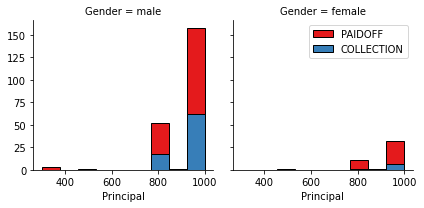

In [124]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

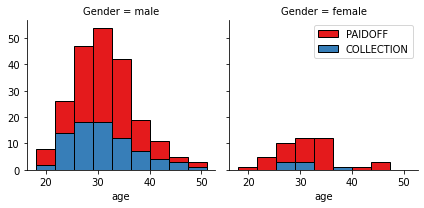

In [125]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


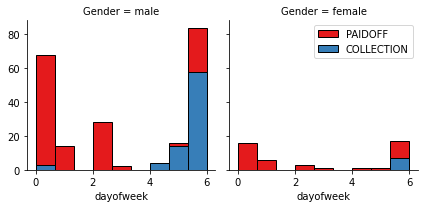

In [126]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [127]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
47,56,56,PAIDOFF,1000,30,2016-09-11,2016-10-10,27,High School or Below,male,6,1
105,126,126,PAIDOFF,1000,15,2016-09-11,2016-09-25,28,High School or Below,male,6,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,1
114,135,135,PAIDOFF,1000,30,2016-09-11,2016-10-10,30,High School or Below,male,6,1
41,49,49,PAIDOFF,800,15,2016-09-11,2016-09-25,50,High School or Below,male,6,1


## Convert Categorical features to numerical values


Let's look at gender:


In [128]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [129]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace({'PAIDOFF': 1, 'COLLECTION':0}, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
47,56,56,1,1000,30,2016-09-11,2016-10-10,27,High School or Below,0,6,1
105,126,126,1,1000,15,2016-09-11,2016-09-25,28,High School or Below,0,6,1
6,8,8,1,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
114,135,135,1,1000,30,2016-09-11,2016-10-10,30,High School or Below,0,6,1
41,49,49,1,800,15,2016-09-11,2016-09-25,50,High School or Below,0,6,1


## One Hot Encoding

#### How about education?


In [130]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [131]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
47,1000,30,27,0,High School or Below
105,1000,15,28,0,High School or Below
6,1000,30,28,0,college
114,1000,30,30,0,High School or Below
41,800,15,50,0,High School or Below


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [132]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
47,1000,30,27,0,1,0,1,0
105,1000,15,28,0,1,0,1,0
6,1000,30,28,0,1,0,0,1
114,1000,30,30,0,1,0,1,0
41,800,15,50,0,1,0,1,0


### Feature Selection


Let's define feature sets, X:


In [133]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
47,1000,30,27,0,1,0,1,0
105,1000,15,28,0,1,0,1,0
6,1000,30,28,0,1,0,0,1
114,1000,30,30,0,1,0,1,0
41,800,15,50,0,1,0,1,0


What are our lables?


In [134]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [135]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769, -0.65321055, -0.42056004,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458, -0.95911111, -0.48739188, -0.42056004,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769, -0.48739188, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.15575453, -0.42056004,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108],
       [-1.31458942, -0.95911111,  3.16061891, -0.42056004,  0.82934003,
        -0.38170062,  1.13639374, -0.86968108]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [137]:
knn_classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [138]:
from sklearn.metrics import jaccard_score, f1_score 

#testing the model on the test data
y_test_pred = knn_classifier.predict(x_test)

#evaluation test
js= jaccard_score(y_test,y_test_pred, average='weighted')
F1_score= f1_score(y_test,y_test_pred)

print(f'The jaccard score is {js} and f1_score is {F1_score}')

The jaccard score is 0.6626877367115058 and f1_score is 0.8690476190476191


# Decision Tree


In [139]:
from sklearn.tree import DecisionTreeClassifier
DCT= DecisionTreeClassifier(criterion='entropy',random_state=0)
DCT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [140]:
from sklearn.metrics import jaccard_score, f1_score 

#testing the model on the test data
y_test_pred = DCT.predict(x_test)

#evaluation test
js= jaccard_score(y_test,y_test_pred, average='weighted')
F1_score= f1_score(y_test,y_test_pred)

print(f'The jaccard score is {js} and f1_score is {F1_score}')

The jaccard score is 0.6030856767698872 and f1_score is 0.8271604938271605


# Support Vector Machine


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc= SVC()
paramters= [{'C':[1, 10, 100, 1000], 'kernel': ['linear']},
           {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma' : [0.5, 0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=svc, param_grid= paramters, scoring= 'accuracy', cv=10)
grid_search= grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_
print(f'The best accuracy is {best_accuracy} and best params are {best_param}')

The best accuracy is 0.7398333333333333 and best params are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [142]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.5,C=10,random_state=0)
svc.fit(x_train,y_train)

SVC(C=10, gamma=0.5, random_state=0)

In [143]:
y_pred=svc.predict(x_test)

In [144]:
from sklearn.metrics import jaccard_score, f1_score 

#testing the model on the test data
y_test_pred = svc.predict(x_test)

#evaluation test
js= jaccard_score(y_test,y_test_pred, average='weighted')
F1_score= f1_score(y_test,y_test_pred)

print(f'The jaccard score is {js} and f1_score is {F1_score}')

The jaccard score is 0.6941620879120879 and f1_score is 0.888888888888889


# Logistic Regression


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lG= LogisticRegression()
paramters= [{'penalty':['l1'], 'C': [0.1, 0.001, 0.01,1.0],'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
           {'penalty':['l2'], 'C': [0.1, 0.001, 0.01,1.0],'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
           {'penalty':['elasticnet'], 'C': [0.1, 0.001, 0.01,1.0],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}]
grid_search = GridSearchCV(estimator=lG, param_grid= paramters, scoring= 'accuracy', cv=10)
grid_search= grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_
print(f'The best accuracy is {best_accuracy} and best params are {best_param}')

The best accuracy is 0.7398333333333333 and best params are {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\nanaq\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nanaq\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nanaq\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nanaq\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_

In [268]:
lG = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')
lG.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [269]:
from sklearn.metrics import jaccard_score, f1_score 

#testing the model on the test data
y_test_pred = lG.predict(x_test)

#evaluation test
js= jaccard_score(y_test,y_test_pred, average='weighted')
F1_score= f1_score(y_test,y_test_pred)

print(f'The jaccard score is {js} and f1_score is {F1_score}')

The jaccard score is 0.6066013313609467 and f1_score is 0.8756756756756757


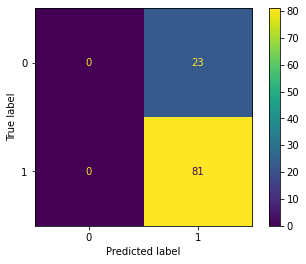

In [270]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=lG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lG.classes_)
disp.plot()
plt.show()

# Model Evaluation using Test set


In [271]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [272]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### Load Test set for evaluation


In [273]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [274]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace({'PAIDOFF': 1, 'COLLECTION':0}, inplace=True)
test=test_df.sample(frac=1)
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
40,302,302,0,1000,30,2016-09-09,2016-10-08,33,High School or Below,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
24,156,156,1,1000,15,2016-09-12,2016-09-26,26,Bechalor,0,0,0
33,236,236,1,1000,30,2016-09-12,2016-10-11,30,college,0,0,0
35,251,251,1,1000,30,2016-09-13,2016-10-12,29,college,0,1,0


In [275]:
test_df[['Principal','terms','age','Gender','education']]
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [276]:
X = Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
y = test_df['loan_status'].values

In [277]:
#Jaccard_score for KNN
y_pred_knn= knn_classifier.predict(X)
JS_knn = jaccard_score(y,y_pred_knn)
JS_knn

0.7115384615384616

In [278]:
#Jaccard_score for Decision Tree
y_pred_DCT= DCT.predict(X)
JS_dct = jaccard_score(y,y_pred_DCT)
JS_dct

0.6521739130434783

In [279]:
#Jaccard_score for SVM
y_pred_svc= svc.predict(X)
JS_svc = jaccard_score(y,y_pred_svc)
JS_svc

0.64

In [280]:
#Jaccard_score for Logistic regression
y_pred_LG= lG.predict(X)
JS_LG = jaccard_score(y,y_pred_LG)
JS_LG

0.7407407407407407

In [281]:
#F1 Score for KNN
f1_knn = f1_score(y,y_pred_knn)
f1_knn

0.8314606741573034

In [282]:
#F1 Score for Decision Tree
f1_dct = f1_score(y,y_pred_DCT)
f1_dct

0.7894736842105262

In [283]:
#F1 Score for SVM
f1_svc = f1_score(y,y_pred_svc)
f1_svc

0.7804878048780488

In [284]:
#F1 Score for Logistic regression
f1_LG = f1_score(y,y_pred_LG)
f1_LG

0.851063829787234

In [285]:
#Log loss for KNN
logLoss_knn = log_loss(y,y_pred_knn)
logLoss_knn

9.594282242459677

In [286]:
#Log loss for Decsion Tree
logLoss_DCT = log_loss(y,y_pred_DCT)
logLoss_DCT

10.233800368576892

In [287]:
#Log loss for SVM
logLoss_svm = log_loss(y,y_pred_svc)
logLoss_svm

11.513073538568415

In [288]:
#Log loss for Logistic regression
logLoss_LG = log_loss(y,y_pred_LG)
logLoss_LG

8.95470488690319

<Figure size 864x576 with 0 Axes>

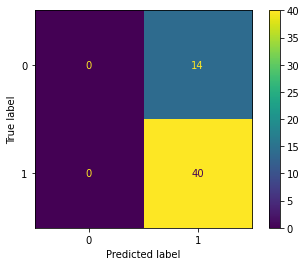

In [296]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y,y_pred_LG, labels=knn_classifier.classes_)
plt.figure(figsize=(12,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lG.classes_)
disp.plot()
plt.show()

In [291]:
y_pred_LG

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [194]:
report={ 'Jaccard':[JS_knn,JS_dct,JS_svc,JS_LG],
       'F1-Score':[f1_knn,f1_dct,f1_svc,f1_LG],
       'LogLoss':['NA','NA','NA',logLoss_LG]}
Algorithm = ['KNN','Decision Tree','SVM','LogisticRegression']

Classification_Report =pd.DataFrame(report,index=Algorithm)
Classification_Report

,Jaccard,F1-Score,LogLoss
KNN,0.711538,0.831461,NA
Decision Tree,0.652174,0.789474,NA
SVM,0.640000,0.780488,NA
LogisticRegression,0.740741,0.851064,8.954705


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
